In [8]:
# Программа для очистки БД текстов по странам с использованием модели (contry_post-model_ngram_rf_RandomForest.bin)

In [9]:
import string

def remove_chars_from_text(text, chars):
    # return "".join([ch for ch in text if ch not in chars])
    content = ''
    for ch in text:
        if ch not in chars:
            content = content + ''.join(ch)
        else:
            content = content + ''.join(' ')
    return content

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
spec_chars = string.punctuation + '\r' + '\n\xa0«»\t—…' 

In [10]:
def predict_contry (Text_post):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import cross_val_score
    import pickle

    
    with open('contry_post-model_ngram_rf_RandomForest_V1_001.bin', 'rb') as f_out:
        rf_RandomForest, vocabl=pickle.load( f_out)
    x_temp = []
    content = str(Text_post).lower()  
    content = remove_emojis(content)
    content = remove_chars_from_text(content, spec_chars)
    content = remove_chars_from_text(content, string.digits)
    for i in range(1, 10):
        content = content.replace('  ', ' ')
    x_temp.append(content)


    count_ngram = CountVectorizer(ngram_range=(2,2))
    X_train_transformed_ngram = count_ngram.fit_transform(x_temp)
    vocab = count_ngram.vocabulary_
    #print(len(vocab))
    #print(vocabl[:20])
    corpus_with_ngram= []
    for text in x_temp:    
        for item in vocab:
            if item.replace(' ', '_') in vocabl:
                text = text.replace(item, item.replace(' ', '_'))
                #print(item)
        corpus_with_ngram.append(text)
    
    #print (corpus_with_ngram)
    count = CountVectorizer(vocabulary = vocabl)
    X_t = count.transform(corpus_with_ngram)
    accuracy = rf_RandomForest.predict_proba(X_t)
    ix = accuracy.argmax(1).item()
    # print(f'predicted class = {log_clf.classes_[ix]} and confidence = {accuracy[0,ix]:.2%}')
    predicted_class =rf_RandomForest.classes_[ix]
    confidence = accuracy[0,ix]    
    return predicted_class, confidence

In [11]:
import os
import tarfile
import urllib.request


country_name_rus = {"Afganistan":'Афганистан',"China":'КНР',"CAR":'Центрально-Африканская Республика',
                    "Ethiopia":"Эфиопия ","India":'Индия', "Iran":'Иран',"KNDR":'КНДР', "Libya":'Ливия',
                    "Morocco":'Морокко', "Sudan":'Судан', "Syria":'Сирия', "Turkey":'Турция',
                    "Argentina":'Аргентина', "DRK_Congo":'ДРК (Конго)', "Burkina Faso":'Буркина-Фасо',
                    "Niger":'Нигер', "Mali":'Мали', "Senegal":'Сенегал', "Egipet":'Египет', "Gvineya":'Гвинея',
                    "Venesuela":'Венесуэла', "Algeria":'Алжир', "Zimbabve":'Зимбабве', "Tunis":'Тунис',
                    "Boliviya":'Боливия', "Braziliya":'Бразилия', "Yuar":'ЮАР', "Burundi":'Бурунди',
                    "Ruanda":'Руанда', "Mongoliya":'Монголия', "Respublika-koreya": 'Южная Корея',
                    "Chili": 'Чили',  'Bangladesh':'Бангладеш', 'Benin':'Бенин', 'Gabon':'Габон',
                    'Ekvatorialnaya-gviney':'Экваториальная Гвинея', 'Keniya':'Кения',
                    'Indoneziya':'Индонезия','Iordaniya':'Иордания', 'Irak':'Ирак',
                    'Kambodzha':'Камбоджа', 'Kuba':'Куба', 'Tailand':'Таиланд', 'Urugvay':'Уругвай',
                    'Kamerun':'Камерун', 'Madagaskar':'Мадагаскар', 'Mozambik':'Мозамбик',
                    'Yaponiya':'Япония'                
                   }

CL =[ "Afganistan","China","CAR", "Ethiopia",
      "India", "Iran","KNDR", "Libya", "Morocco", "Sudan",
      "Syria", "Turkey", "Argentina", "DRK_Congo", "Burkina Faso",
      "Niger", "Mali", "Senegal", "Egipet", "Gvineya", "Venesuela",
      "Algeria", "Zimbabve", "Tunis", "Boliviya", "Braziliya",
      "Yuar", "Burundi", "Ruanda", "Mongoliya", "Respublika-koreya",
     "Chili", 'Bangladesh', 'Benin', 'Gabon',
     'Keniya', 'Indoneziya','Iordaniya', 'Irak', 'Kambodzha', 'Kuba',
     'Tailand','Urugvay', 'Kamerun', 'Madagaskar', 'Mozambik', 'Yaponiya'
    ]

DIR_PATH= {}
DOWNLOAD_ROOT = "D:/ML/"
print(DOWNLOAD_ROOT)
#DATASET_PATH = os.path.join("datasets", "Countries")
DATASET_PATH = os.path.join("datasets", "Countries_V1")

for item in CL:
    DIR_PATH[country_name_rus[item]] = os.path.join(DATASET_PATH, item)
    
filenames = {}
for items in DIR_PATH.keys():   
    filenames[items] = [name for name in sorted(os.listdir(DIR_PATH[items])) ] 
    print(items)

D:/ML/
Афганистан
КНР
Центрально-Африканская Республика
Эфиопия 
Индия
Иран
КНДР
Ливия
Морокко
Судан
Сирия
Турция
Аргентина
ДРК (Конго)
Буркина-Фасо
Нигер
Мали
Сенегал
Египет
Гвинея
Венесуэла
Алжир
Зимбабве
Тунис
Боливия
Бразилия
ЮАР
Бурунди
Руанда
Монголия
Южная Корея
Чили
Бангладеш
Бенин
Габон
Кения
Индонезия
Иордания
Ирак
Камбоджа
Куба
Таиланд
Уругвай
Камерун
Мадагаскар
Мозамбик
Япония


In [12]:
stemming=False # Stemming control
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [13]:
ru_stopwords = set(
        """
    а авось ага агу аж ай али алло ау ах ая
    б будем будет будете будешь буду будут будучи будь будьте бы был была были было
    быть бац без безусловно бишь благо благодаря ближайшие близко более больше
    будто бывает бывала бывали бываю бывают бытует
    в вам вами вас весь во вот все всё всего всей всем всём всеми всему всех всею
    всея всю вся вы ваш ваша ваше ваши вдали вдобавок вдруг ведь везде вернее
    взаимно взаправду видно вишь включая вместо внакладе вначале вне вниз внизу
    вновь вовсе возможно воистину вокруг вон вообще вопреки вперекор вплоть
    вполне вправду вправе впрочем впрямь вресноту вроде вряд всегда всюду
    всякий всякого всякой всячески вчеред
    г го где гораздо гав
    д да для до дабы давайте давно давным даже далее далеко дальше данная
    данного данное данной данном данному данные данный данных дану данунах
    даром де действительно довольно доколе доколь долго должен должна
    должно должны должный дополнительно другая другие другим другими
    других другое другой
    е его едим едят ее её ей ел ела ем ему емъ если ест есть ешь еще ещё ею едва
    ежели еле
    ж же
    з за затем зато зачем здесь значит зря
    и из или им ими имъ их ибо иль имеет имел имела имело именно иметь иначе
    иногда иным иными итак ишь
    й
    к как кем ко когда кого ком кому комья которая которого которое которой котором
    которому которою которую которые который которым которыми которых кто ка кабы
    каждая каждое каждые каждый кажется казалась казались казалось казался казаться
    какая какие каким какими каков какого какой какому какою касательно кой коли
    коль конечно короче кроме кстати ку куда
    л ли либо лишь любая любого любое любой любом любую любыми любых
    м меня мне мной мною мог моги могите могла могли могло могу могут мое моё моего
    моей моем моём моему моею можем может можете можешь мои мой моим моими моих
    мочь мою моя мы мало меж между менее меньше мимо многие много многого многое
    многом многому можно мол му
    н на нам нами нас наса наш наша наше нашего нашей нашем нашему нашею наши нашим
    нашими наших нашу не него нее неё ней нем нём нему нет нею ним ними них но
    наверняка наверху навряд навыворот над надо назад наиболее наизворот
    наизнанку наипаче накануне наконец наоборот наперед наперекор наподобие
    например напротив напрямую насилу настоящая настоящее настоящие настоящий
    насчет нате находиться начала начале неважно негде недавно недалеко незачем
    некем некогда некому некоторая некоторые некоторый некоторых некто некуда
    нельзя немногие немногим немного необходимо необходимости необходимые
    необходимым неоткуда непрерывно нередко несколько нету неужели нечего
    нечем нечему нечто нешто нибудь нигде ниже низко никак никакой никем
    никогда никого никому никто никуда ниоткуда нипочем ничего ничем ничему
    ничто ну нужная нужно нужного нужные нужный нужных ныне нынешнее нынешней
    нынешних нынче
    о об один одна одни одним одними одних одно одного одной одном одному одною
    одну он она оне они оно от оба общую обычно ого однажды однако ой около оный
    оп опять особенно особо особую особые откуда отнелижа отнелиже отовсюду
    отсюда оттого оттот оттуда отчего отчему ох очевидно очень ом
    п по при паче перед под подавно поди подобная подобно подобного подобные
    подобный подобным подобных поелику пожалуй пожалуйста позже поистине
    пока покамест поколе поколь покуда покудова помимо понеже поприще пор
    пора посему поскольку после посреди посредством потом потому потомушта
    похожем почему почти поэтому прежде притом причем про просто прочего
    прочее прочему прочими проще прям пусть
    р ради разве ранее рано раньше рядом
    с сам сама сами самим самими самих само самого самом самому саму свое своё
    своего своей своем своём своему своею свои свой своим своими своих свою своя
    себе себя собой собою самая самое самой самый самых сверх свыше се сего сей
    сейчас сие сих сквозь сколько скорее скоро следует слишком смогут сможет
    сначала снова со собственно совсем сперва спокону спустя сразу среди сродни
    стал стала стали стало стать суть сызнова
    та то ту ты ти так такая такие таким такими таких такого такое такой таком такому такою
    такую те тебе тебя тем теми тех тобой тобою того той только том томах тому
    тот тою также таки таков такова там твои твоим твоих твой твоя твоё
    теперь тогда тоже тотчас точно туда тут тьфу тая
    у уже увы уж ура ух ую
    ф фу
    х ха хе хорошо хотел хотела хотелось хотеть хоть хотя хочешь хочу хуже
    ч чего чем чём чему что чтобы часто чаще чей через чтоб чуть чхать чьим
    чьих чьё чё
    ш ша
    щ ща щас
    ы ых ые ый
    э эта эти этим этими этих это этого этой этом этому этот этою эту эдак эдакий
    эй эка экий этак этакий эх
    ю
    я явно явных яко якобы якоже
    
    и что не это  быть этот это свой как - этот весь быть что ▫ но г. % 
    afgbezparandzhi argentinarusa irandezhurniy info raspp аль
    """.split()
    )

In [14]:
from charset_normalizer import from_path
import string

def remove_chars_from_text(text, chars):
    # return "".join([ch for ch in text if ch not in chars])
    content = ''
    for ch in text:
        if ch not in chars:
            content = content + ''.join(ch)
        else:
            content = content + ''.join(' ')
    return content

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
spec_chars = string.punctuation + '\r' + '\n\xa0«»\t—…' 

x_temp = []
y_temp = []
predict_class = []
confidence = []
filename = []
for item in filenames.keys():
    post_temp=[]
    for names in filenames[item]:
        content = str(from_path(DIR_PATH[item]+"\\"+names).best()).lower()  
        content = remove_emojis(content)
        # content = re.sub(r'(\\u[0-9A-Fa-f]+)', lambda matchobj: chr(int(matchobj.group(0)[2:], 16)), content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words)        
        predicted_class = "None"
        confidence_class = 0.
        try:
            if content != '':
                predicted_class, confidence_class = predict_contry (content)
                #print('predicted_class = {}, confidence_class = {:.0f}%'.format(predicted_class, confidence_class*100))
                #if predicted_class != item or confidence_class <0.2:
                #    print(content)
        except Exception as ex:
            print(ex)   
            

        x_temp.append(content)
        y_temp.append(item)
        predict_class.append(predicted_class)
        confidence.append(confidence_class)
        filename.append(names)

empty vocabulary; perhaps the documents only contain stop words
empty vocabulary; perhaps the documents only contain stop words


In [15]:
len(x_temp)

10949

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'Content':x_temp, 'Country':y_temp, 'Predict_class':predict_class, 'Confidence': confidence,'filename': filename }
df = pd.DataFrame(data, columns = ['Content', 'Country', 'Predict_class', 'Confidence', 'filename'])

In [17]:
target = 10 #Целевой показатель отсекаемого кол-ва текстов в %
Confidence_target = {}
for item in CL:   
    Selection_by_country = df[(df['Country']==country_name_rus[item])]
    print ('{}, Исходное количество тексков: {} шт.'.format(country_name_rus[item], Selection_by_country.shape[0]))
    for i in [x / 100.0 for x in range(0, 100, 1)]:
        tail = Selection_by_country.shape[0] - Selection_by_country[(Selection_by_country['Country']==Selection_by_country['Predict_class']) & (Selection_by_country['Confidence']>i)].shape[0]
        print ('Отсекаемый процент: {:.0f}%, удаляемое кол-во текстов : {} шт.'.format(i*100, tail))
        if Selection_by_country.shape[0] != 0:
            if tail/Selection_by_country.shape[0]*100>target:
                Confidence_target[item] = i
                break
print (Confidence_target)      

Афганистан, Исходное количество тексков: 462 шт.
Отсекаемый процент: 0%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 1%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 2%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 3%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 4%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 5%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 6%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 7%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 8%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 9%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 10%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 11%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 12%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 13%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 14%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процент: 15%, удаляемое кол-во текстов : 14 шт.
Отсекаемый процен

In [18]:
 #Целевой показатель отсекаемого кол-ва текстов в %
for item in CL:   
    Selection_by_country = df[(df['Country']==country_name_rus[item])]
    print ('{}, Исходное количество тексков: {} шт.'.format(country_name_rus[item], Selection_by_country.shape[0]))    
    tail = Selection_by_country[(Selection_by_country['Country']!=Selection_by_country['Predict_class']) | (Selection_by_country['Confidence']<=Confidence_target[item])].sort_values('Confidence', ascending=False) 
    print (tail[:3])
    print (tail[-3:])        

Афганистан, Исходное количество тексков: 462 шт.
                                               Content     Country  \
42   афганские туркменки узбечки провинций кундуз д...  Афганистан   
393  афганистан получил очередную партию гуманитарн...  Афганистан   
423  сми талибы ведут бои пакистанскими военными гр...  Афганистан   

    Predict_class  Confidence                             filename  
42     Афганистан    0.480000  @afgbezparandzhi2356_5_telegram.txt  
393    Афганистан    0.480000                    tass_21645765.txt  
423         Индия    0.471192                    tass_21772665.txt  
                                               Content     Country  \
264  новости афганской промышленности кандагаре лет...  Афганистан   
254  новости афганской промышленности кандагаре лет...  Афганистан   
179  фаузия куфи бывший вице спикер афганского парл...  Афганистан   

    Predict_class  Confidence                             filename  
264         Индия    0.169143      @afgbezpa

In [20]:
import os
for country in CL:

    if not os.path.exists('./datasets/Countries_V2/{}'.format(country)):
        os.makedirs('./datasets/Countries_V2/{}'.format(country))
    Selection_by_country = df[(df['Country']==country_name_rus[country])]
    print ('{}, Исходное количество тексков: {} шт.'.format(country_name_rus[country], Selection_by_country.shape[0]))    
    tail = Selection_by_country[(Selection_by_country['Country']==Selection_by_country['Predict_class']) & (Selection_by_country['Confidence']>Confidence_target[country])].sort_values('Confidence', ascending=False) 
    #print(tail)
    #print(tail['Content'][167])        
    #print(tail.index.get_level_values(0))
    for item in tail.index.get_level_values(0): 
        #print(tail['Content'][item])
        #print(tail['filename'][item])
        #print('./datasets/Countries_V1/{}/{}'.format(country, tail['filename'][item]))
        try:
            with open('./datasets/Countries_V2/{}/{}'.format(country, tail['filename'][item]), "w", encoding="utf-8") as some_file:
                print(tail['Content'][item], file=some_file)
                some_file.close()          
        except Exception as ex:
            print(ex)       

Афганистан, Исходное количество тексков: 462 шт.
КНР, Исходное количество тексков: 876 шт.
Центрально-Африканская Республика, Исходное количество тексков: 327 шт.
Эфиопия , Исходное количество тексков: 405 шт.
Индия, Исходное количество тексков: 1042 шт.
Иран, Исходное количество тексков: 363 шт.
КНДР, Исходное количество тексков: 302 шт.
Ливия, Исходное количество тексков: 213 шт.
Морокко, Исходное количество тексков: 204 шт.
Судан, Исходное количество тексков: 201 шт.
Сирия, Исходное количество тексков: 218 шт.
Турция, Исходное количество тексков: 397 шт.
Аргентина, Исходное количество тексков: 214 шт.
ДРК (Конго), Исходное количество тексков: 110 шт.
Буркина-Фасо, Исходное количество тексков: 266 шт.
Нигер, Исходное количество тексков: 164 шт.
Мали, Исходное количество тексков: 146 шт.
Сенегал, Исходное количество тексков: 201 шт.
Египет, Исходное количество тексков: 162 шт.
Гвинея, Исходное количество тексков: 177 шт.
Венесуэла, Исходное количество тексков: 185 шт.
Алжир, Исходное 

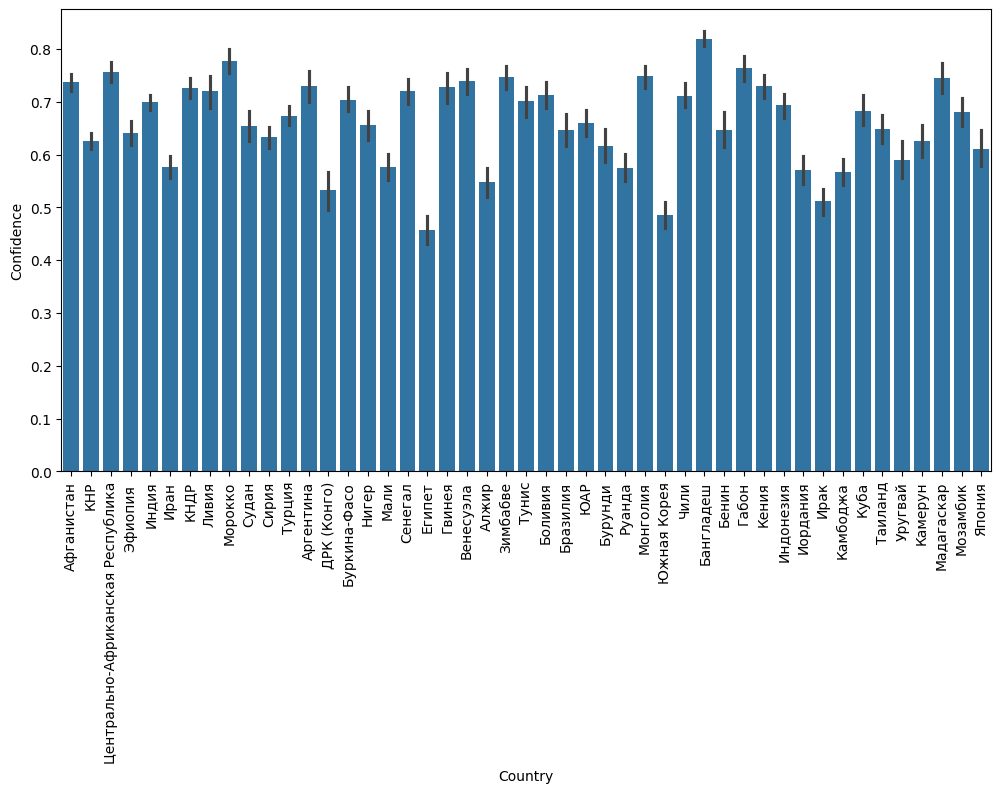

In [21]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Country", y="Confidence", data=df)

ax.tick_params(axis='x', labelrotation=90)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

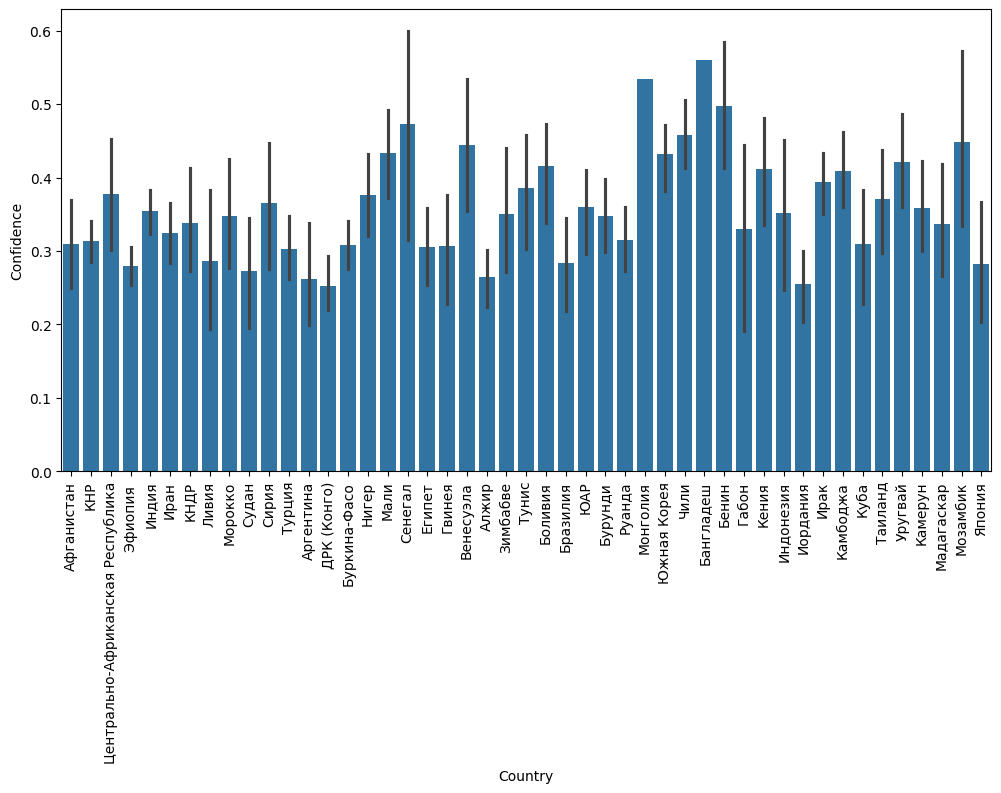

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Country", y="Confidence", data=df[(df['Country']!=df['Predict_class'])])

ax.tick_params(axis='x', labelrotation=90)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [54]:
import sys
import os
import hashlib

def chunk_reader(fobj, chunk_size=1024):
    """Generator that reads a file in chunks of bytes"""
    while True:
        chunk = fobj.read(chunk_size)
        if not chunk:
            return
        yield chunk

def check_for_duplicates(paths, hash=hashlib.sha1):
    hashes = {}
    #print (os.listdir(paths))        
    for filename in [name for name in sorted(os.listdir(paths)) ]:
        full_path = os.path.join(paths, filename)
        hashobj = hash()
        for chunk in chunk_reader(open(full_path, 'rb')):
            hashobj.update(chunk)
        file_id = (hashobj.digest(), os.path.getsize(full_path))
        duplicate = hashes.get(file_id, None)
        if duplicate:
            print ("Duplicate found: %s and %s" % (full_path, duplicate))
            os.remove(full_path)
        else:
            hashes[file_id] = full_path



In [57]:
               
for country in CL:
    path = os.path.join('./datasets/', "Countries_V2", country)
    #remove_duplicates(path)
    check_for_duplicates(path)     

Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2290_5_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2290_4_telegram.txt
Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2290_9_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2290_8_telegram.txt
Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2400_2_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2400_1_telegram.txt
Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2421_2_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2421_1_telegram.txt
Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2448_16_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2448_15_telegram.txt
Duplicate found: ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2448_1_telegram.txt and ./datasets/Countries_V2\Afganistan\@afgbezparandzhi2448_0_telegram.txt
Duplicate found: ./d